In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=380c65a7ec561d21ff9c2625e2efcafeb6e96d6bb5ae9aae7ebd1d638a4a9387
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 25.1 s


In [ ]:
#provide your url
DATA_PATH= 'drive/My Drive/PATH/'

time: 1.49 ms


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 4.23 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  20000
Length of y:  20000
time: 1.36 ms


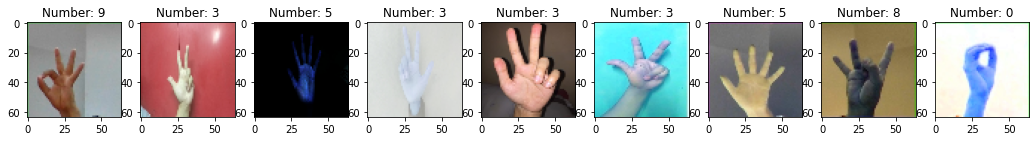

time: 1.55 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[:9], y[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
x.shape

(20000, 64, 64, 3)

time: 9.61 ms


In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 71.1 ms


In [ ]:
x=x/255.0

time: 1.01 s


In [ ]:
x[0]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, stratify=y)

time: 1.16 s


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (16000, 64, 64, 3)
ytest shape:  (4000, 64, 64, 3)
time: 3.32 ms


In [ ]:
zero=[]
for index, (image, label) in enumerate(zip(xtest, ytest)):
  if label ==5:
    zero.append(image)
len(zero)

400

time: 19.2 ms


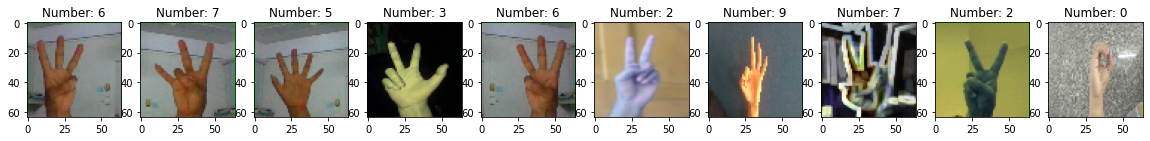

time: 1.53 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtest.shape

(4000, 64, 64, 3)

time: 4.15 ms


In [ ]:
ytrain.shape

(16000,)

time: 3.63 ms


In [ ]:
from sklearn.linear_model import LogisticRegression

time: 97.6 ms


In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=500, verbose=1)

time: 1.1 ms


In [ ]:
# logisticRegr.fit(xtrain, ytrain)
logisticRegr.fit(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.7min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

time: 10min 40s


In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(xtest[300].reshape(1,-1))

array([4])

time: 5.75 ms


In [ ]:
#Test Acc
score = logisticRegr.score(np.reshape(xtest, (xtest.shape[0], -1)), ytest)
print(score*100,'%')

66.7 %
time: 175 ms


In [ ]:
score = logisticRegr.score(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)
print(score*100,'%')

83.05624999999999 %
time: 710 ms


In [ ]:
predictions = logisticRegr.predict(np.reshape(xtest, (xtest.shape[0], -1)))

time: 174 ms


In [ ]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"%(logisticRegr, metrics.classification_report(ytest, predictions)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       400
           1       0.64      0.71      0.68       400
           2       0.67      0.61      0.64       400
           3       0.63      0.63      0.63       400
           4       0.61      0.65      0.63       400
           5       0.69      0.63      0.66       400
           6       0.75      0.70      0.73       400
           7       0.65      0.60      0.63       400
           8       0.69      0.68      0.68       400
           9       0.69      0.74      0.71       400

    accuracy                           0

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  1305
Total number of correctly classified class:  2695
Total number testing data:  4000
time: 6 ms


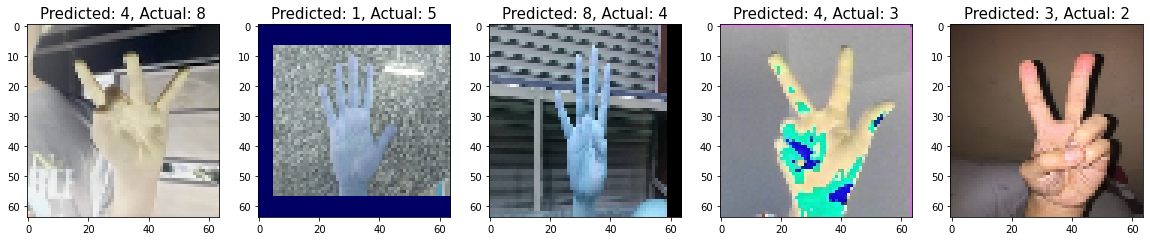

time: 1.09 s


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], ytest[badIndex]), fontsize = 15)

In [ ]:
logisticRegr.predict(xtest[3].reshape(1,-1))

array([1])

time: 4.32 ms


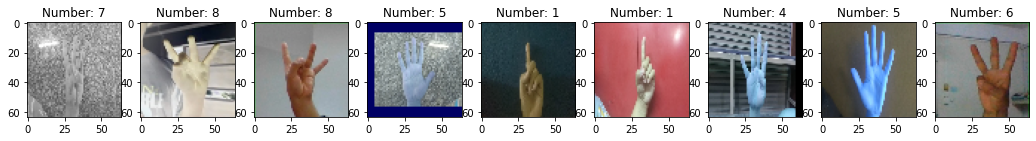

time: 1.39 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

time: 33.3 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[314  13  12  11  13   7  14   9   9  12]
 [ 17 279  19  21   8   9   9   9  13   7]
 [ 11  17 233  24  17  24  20  23  16  12]
 [ 14  15  20 247  15  16  11  14  10   9]
 [ 16  18  17  27 244  24   9  23  12  16]
 [ 13  13  10  29  26 271  18  12  19  15]
 [  9  13  17  15  15   8 291  15   9  12]
 [ 14  16  11  20  15  13  10 252  27  16]
 [ 18  10  16  19   9   8  15  21 277  13]
 [ 19  11   6  14  10  16   7  12   9 287]]
time: 16.1 ms


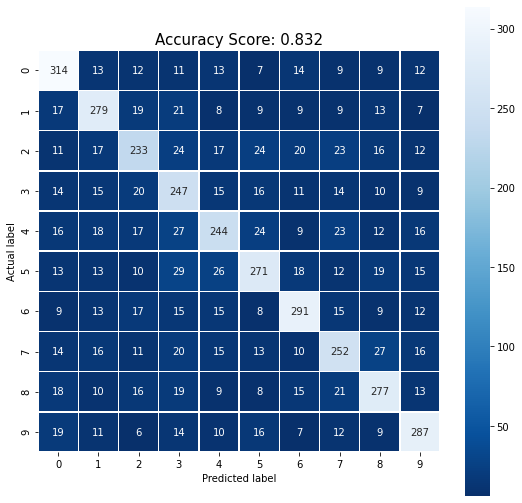

time: 625 ms


In [ ]:
plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, fmt="1", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);